In [167]:
import pandas as pd

df = pd.read_excel('Top_oil_companies.xlsx')
df.dropna(subset=['출원인'], inplace=True)
df['출원인'] = df['출원인'].str.lower()

In [168]:
df['companies'] = df['출원인'].apply(lambda x: '|'.join(sorted(set(x.split('|')))))
for i,value in enumerate(df['companies'].str.split('|', expand=True).iloc[:,6]):
    if value:
        print(i)


1182
1188


In [169]:
df['companies'].iloc[1182]

'basell polyolefine gmbh|basf antwerpen n.v.|borealis a.g.|bp europa se|chemelot campus b.v.|sabic global technologies b.v.|total research and technology feluy'

In [170]:
df.columns

Index(['일련번호', '번호', '명칭', '요약', '출원인', '출원인국가', '출원인대표명', '발명자', '발명자국가',
       '국제특허분류', '공통특허분류', '미국특허분류', '출원번호', '출원일', '공개번호', '공개일', '공고번호',
       '공고일', '등록번호', '등록일', '우선권번호', '국제출원번호', '국제출원일', '국제공개번호', '국제공개일',
       'INPADOC 패밀리', 'Simple 패밀리', '심사관', '대리인', '지정국가', '독립 청구항수', '전체 청구항수',
       '대표 청구항', '대표 청구항(원문)', '권리 현황', '최종 상태', '현재소유자', '권리만료예상일', '자국인용특허',
       '외국인용특허', '자국피인용특허', '자국인용횟수', '자국피인용횟수', '특허평가등급', '특허평가점수',
       '발명자평가평균등급', '발명자평가평균점수', 'FI', 'F-Term', 'INPADOC패밀리수',
       'INPADOC패밀리국가수', 'Simple패밀리수', 'Simple패밀리국가수', '발명자수', 'Genealogy수',
       '패밀리 번호', '전용실시권자', '통상실시권자', 'INPADOC패밀리국가', 'Simple패밀리국가', '소유권이전여부',
       '소유권최종양도일', '특허전문 Link', 'companies'],
      dtype='object')

In [171]:

# 회사명 통일성 확보
df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))

# Create separate rows for each combination
df_expanded = df.explode('companies')
# 결과 출력
print(df_expanded['companies'].value_counts()[:30])

companies
saudi arabian oil company                                                                  4694
shell oil company                                                                          1870
chevron u.s.a. inc.                                                                        1496
sk innovation co., ltd.                                                                     975
china petroleum & chemical corporation                                                      707
shell internationale research maatschappij b.v.                                             414
chevron phillips chemical company lp                                                        380
eni s.p.a.                                                                                  338
bp corporation north america inc.                                                           323
total sa                                                                                    320
petrochina company limited    

In [172]:
name_first_words=set()
for name in df_expanded['companies'].value_counts().index:
    name_first_words.add(name.replace('-',' ').split()[0])
print(name_first_words)


{'consejo', 'electricité', 'solid', 'borealis', 'weatherford', 'cggveritas', 'chervon', 'uchicago', 'boreskov', 'massachusetts', 'statoil', 'marquette', 'building', 'rutgers,', 'membrane', '.', 'japan', 'fushun', 'trustees', 'research', 'ceramatec,', 'cranfield', 'eni', 'bandpay', 'kuwait', 'pontificia', 'consiglio', 'technip', 'petròleo', 'roberts,', 'overpipe', 'foro', 'commissariat', 'solvay', 'veolia', 'c/o', 'texas', 'polymeright,', 'pb', 'versalis', 'cumulus', 'piacsek', 'fca', 'zurich', 'institut', 'dailan', 'flying', 'jindal', 'fundação', 'shanghai', 'shanks', 'applied', 'armines', 'fuel', 'schlumberger', 'lukoil', 'petrochina', 'beiging', 'rs', 'air', 'jme', 'vadovations,', 'ineos', 'lanzhou', 'trofimuk', 'root,', 'misuzu', 'yunsung', 'groundmetrics,', 'meg', 'yu', 'verdun;', 'eif—astute', 'openfield', 'hydrus', 'zhong', 'bashkir', 'colorado', 'synhelion', 'opterra', 'apix', 'daelim', 'hibot', 'blackpoint', 'senseor', 'kasab', 'korea', 'schlumbeger', 'sicat', 'asudi', 'associa

In [173]:

top_IOaGI_30 = [
'Saudi Arabian Oil Co',
'Petróleo Brasileiro SA - Petrobras',
'PJSC LUKOIL',
'Exxon Mobil Corp',
'Public JSC Gazprom',
'TotalEnergies SE',
'Equinor ASA',
'Chevron Corp',
'Shell plc',
'China Petroleum & Chemical Corp',
'Oil & Natural Gas Corp Ltd',
'Surgutneftegas Public JSC',
'PetroChina Co Ltd',
'Eni S.p.A.',
'BP p.l.c.',
'Suncor Energy Inc',
]

top_IOaGI_30 = [i.lower() for i in top_IOaGI_30]
top_IOaGI_30

['saudi arabian oil co',
 'petróleo brasileiro sa - petrobras',
 'pjsc lukoil',
 'exxon mobil corp',
 'public jsc gazprom',
 'totalenergies se',
 'equinor asa',
 'chevron corp',
 'shell plc',
 'china petroleum & chemical corp',
 'oil & natural gas corp ltd',
 'surgutneftegas public jsc',
 'petrochina co ltd',
 'eni s.p.a.',
 'bp p.l.c.',
 'suncor energy inc']

In [174]:
top2comp={name:[] for name in top_IOaGI_30}
top2comp['sk innovation']=[]


In [175]:
len(top_IOaGI_30)

16

In [176]:
len(df)

13308

In [177]:
len(df_expanded)

16273

In [178]:
pass_num = 0
cannot_classify_num =0
for company in df_expanded['companies'].value_counts().index:
    if 'institute' in company or 'university' in company or 'universite' in company:
        pass_num+=1
        continue
    isin= False
    
    if 'lukoil' in company:
        top2comp['pjsc lukoil'].append(company)
        isin =True
    elif 'sk' in company:
        top2comp['sk innovation'].append(company)
        isin = True
    elif 'petroleo' in company:
        top2comp['petróleo brasileiro sa - petrobras'].append(company)
        isin = True
        
    for name in top2comp:
        if name.split()[0] in company:
            top2comp[name].append(company)
            isin = True
            
    
    
    if not isin:
        cannot_classify_num+=1
        print(company)
        
print(pass_num)   
print(cannot_classify_num)   
    

total sa
aramco services company
schlumberger technology corporation
ifp energies nouvelles
halliburton energy services, inc.
uop llc
universidade federal do rio de janeiro - ufrj
jgc catalysts and chemicals ltd.
triad national security, llc
aramco far east (beijing) business services co., ltd.
centre national de la recherche scientifique
japan cooperation center petroleum
aramco innovations llc
sabic global technologies b.v.
versalis s.p.a.
georgia tech research corporation
wireless instrumentation systems as
universidade federal do rio grande do sul - ufrgs
ecole polytechnique
cameron international corporation
silixa ltd.
vadovations, inc.
consiglio nazionale delle ricerche
biosynthetic technologies, llc
aramco overseas company uk ltd
shanxi lu'an environmental energy development co. ltd.
total se
sdg llc
universidade federal de minas gerais
japan cooperation center, petroleum
m-i drilling fluids uk ltd
sinopec tech houston, llc.
air products and chemicals, inc.
shanghai bi ke clean 

In [179]:
n = 0
my_list=[]
for key in top2comp:
    n+=len(top2comp[key])
    top2comp[key]=list(set(top2comp[key]))
    my_list.extend(top2comp[key])
    
print(len(set(my_list)))
n

duplicates = set()
unique_values = set()

for value in my_list:
    if value in unique_values:
        duplicates.add(value)
    else:
        unique_values.add(value)

print("중복된 값:", list(duplicates))

295
중복된 값: ['northwest oilfield branch, china petroleum & chemical co., ltd', 'shell oil company', 'china petroleum & chemical corporation southwest oil & gas company', 'saudi arabian oil compay', 'chevron (china) chemicals co., ltd.', 'shell oil comapny', 'shell oil co,pany', 'saudi arabian oil co', 'saudi  arabian oil company', 'saudi arabian oil comoany', 'shell oil ocmpany', 'bp (china) holdings co., ltd.', 'exxonmobil oil corporation', 'petrochina huabei oilfield company', 'obschestvo s ogranichennoi otvestvennostyu "lukoil-nizhegorodsky nauchno-issledovatelskii i proektnii institut po pereraboteke nefti"', 'saudi arabian oil company and', 'shengli oilfield branch, china petroleum & chemical co., ltd', 'bp (china) holdings limited', 'shell oil cpmpany', 'saudi arabian oil comapny', 'saudi arabia oil company', 'shell oil compnay', 'saudi arabian oil company, dhahran, saudi arabia', 'saudi arabian oil company', 'petrochina west pipeline company', 'obschestvo s ogranichennoi otvetstv

In [180]:
duplicate_comp = list(duplicates)[0]
print (duplicate_comp)
for key in top2comp:
    if duplicate_comp in top2comp[key]:
        print(key)

northwest oilfield branch, china petroleum & chemical co., ltd
china petroleum & chemical corp
oil & natural gas corp ltd


In [181]:
for i in df_expanded['companies'].value_counts().index:
    if 'surgutneftegas' in i:
        print(i)

In [182]:
for i in df_expanded['companies'].value_counts().index:
    if i[:3] == 'sk ':
        print(i)

sk innovation co., ltd.
sk ie technology co., ltd.
sk global chemical co., ltd.
sk on co., ltd.
sk innovation co.,ltd.
sk geo centric co., ltd.
sk energy co., ltd.
sk lubricants co., ltd.
sk innovation co ltd
sk innovation co., ltd
sk innovation co.,ltd
sk innovation co. ltd.
sk global chemical co ltd
sk innovations co., ltd.
sk incheon petrochem co., ltd.
sk energy co ltd
sk innovation co., lt.d
sk enmove co., ltd
sk gloval chemical co., ltd.
sk global chemical co, ltd.
sk innovation  co., ltd.
sk on co, ltd.
sk innovation co, ltd.
sk ie technology co. , ltd.
sk innovation co, ltd
sk on co., ltd
sk inc.
sk gc americas inc.
sk ie technology co ltd
sk earthon co., ltd.


In [183]:
df.columns

Index(['일련번호', '번호', '명칭', '요약', '출원인', '출원인국가', '출원인대표명', '발명자', '발명자국가',
       '국제특허분류', '공통특허분류', '미국특허분류', '출원번호', '출원일', '공개번호', '공개일', '공고번호',
       '공고일', '등록번호', '등록일', '우선권번호', '국제출원번호', '국제출원일', '국제공개번호', '국제공개일',
       'INPADOC 패밀리', 'Simple 패밀리', '심사관', '대리인', '지정국가', '독립 청구항수', '전체 청구항수',
       '대표 청구항', '대표 청구항(원문)', '권리 현황', '최종 상태', '현재소유자', '권리만료예상일', '자국인용특허',
       '외국인용특허', '자국피인용특허', '자국인용횟수', '자국피인용횟수', '특허평가등급', '특허평가점수',
       '발명자평가평균등급', '발명자평가평균점수', 'FI', 'F-Term', 'INPADOC패밀리수',
       'INPADOC패밀리국가수', 'Simple패밀리수', 'Simple패밀리국가수', '발명자수', 'Genealogy수',
       '패밀리 번호', '전용실시권자', '통상실시권자', 'INPADOC패밀리국가', 'Simple패밀리국가', '소유권이전여부',
       '소유권최종양도일', '특허전문 Link', 'companies'],
      dtype='object')

In [184]:
df[~df['공개일'].isna()]

,일련번호,번호,명칭,요약,출원인,출원인국가,출원인대표명,발명자,발명자국가,국제특허분류,...,Genealogy수,패밀리 번호,전용실시권자,통상실시권자,INPADOC패밀리국가,Simple패밀리국가,소유권이전여부,소유권최종양도일,특허전문 Link,companies
0,1,WO23196956A1,FOAM STABILIZATION USING NANOPARTICLES,A method of stimulating a hydrocarbon-bearing ...,saudi arabian oil company|aramco services company,SA|US,NaN,"KARADKAR, Prasad, Baburao|HARBI, Bader, G.|BAT...",SA|SA|SA,"C09K-008/60, C09K-008/68, C09K-008/70, C09K-00...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco services company, saudi arabian oil co..."
1,2,WO23196806A1,CHROMIUM-CATALYZED REACTIONS OF CARBON MONOXID...,A hydrocarbon compound and carbon monoxide are...,chevron phillips chemical company lp,US,NaN,"MCDANIEL, Max, P.|REFVIK, Mitchell, D.|PRAETOR...",US|US|US|US|US|US|US,"C07B-041/06, C07C-045/49, B01J-023/68, C07C-02...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,[chevron phillips chemical company lp]
2,3,WO23196613A1,METHOD FOR CO2 SEQUESTRATION MEASUREMENT AND Q...,A process for quantifying CO2 sequestration wi...,saudi arabian oil company|aramco services company,SA|US,NaN,"AL-QASIM, Abdulaziz, S.|KOKAL, Sunil",SA|SA,"E21B-041/00, E21B-049/08, E21B-043/16",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco services company, saudi arabian oil co..."
3,4,WO23195875A1,RADIATION ACTIVATED WELL TREATMENT,A well treatment composition may include a cap...,saudi arabian oil company|aramco innovations llc,SA|RU,NaN,"ZHARNIKOV, Timur|ORLOV, Maxim|CHEN, Tao",RU|RU|SA,"C09K-008/03, C09K-008/524, C09K-008/528, C09K-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco innovations llc, saudi arabian oil com..."
4,5,WO23195710A1,METHOD AND DEVICE FOR PRODUCING WASTE PLASTIC ...,The present disclosure provides a method for p...,"sk innovation co., ltd.|sk geo centric co., ltd.",KR|KR,NaN,"JO, Sanghwan|KANG, Sookil|LEE, Howon|JUNG, Jae...",KR|KR|KR|KR|KR|KR,"C10G-001/10, C10G-001/00, C10G-025/00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[sk geo centric co., ltd., sk innovation co., ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13092,13097,US8697599,Methods of preparing a polymerization catalyst,A method comprising (a) contacting a support a...,chevron phillips chemical company lp,US,CHEVRON PHILLIPS CHEMICAL LP,Benham; Elizabeth A.|McDaniel; Max P.|Collins;...,US|US|US|US,"B01J-021/00, B01J-023/00, C08F-110/02, C08F-00...",...,2.0,42224777.0,NaN,NaN,"BR,CN,CO,EP,ES,KR,MX,SG,US,WO","BR,CN,CO,EP,ES,KR,MX,SG,US,WO",N,NaN,https://service.wisdomain.net/FullTextService/...,[chevron phillips chemical company lp]
13093,13098,US8461404,Aromatization catalyst comprising prolongated ...,A prolongated silica bound zeolite support com...,chevron phillips chemical company lp,US,CHEVRON PHILLIPS CHEMICAL LP,Khare; Gyanesh P.,US,"C07C-005/10, C07C-005/00, C07C-002/00",...,2.0,40427891.0,NaN,NaN,"CN,EP,JP,US,WO","CN,EP,JP,US,WO",N,NaN,https://service.wisdomain.net/FullTextService/...,[chevron phillips chemical company lp]
13094,13099,JP2011105771A2,PRODUCTION OF ACETIC ACID,PROBLEM TO BE SOLVED: To solve the problems of...,bp chemicals ltd,GB,NaN,COOK JOHN|ELLIS BRIAN|HOWARD PHILIP|JONES MICH...,NaN,"C07C-051/215, C07C-053/08, C07C-051/25, C07C-0...",...,NaN,10838289.0,NaN,NaN,"AT,AU,BR,CA,CN,DE,EP,ES,GB,ID,JP,KR,MY,NO,RS,R...","AT,AU,BR,CA,CN,DE,EP,ES,GB,ID,JP,KR,MY,NO,RS,R...",NaN,NaN,https://service.wisdomain.net/FullTextService/...,[bp chemicals ltd]
13095,13100,JP2011099122A2,REDUCED COLOR MOLYBDENUM-CONTAINING COMPOSITION,PROBLEM TO BE SOLVED: To provide a novel metho...,chevron oronite co llc,US,NaN,RUHE WILLIAM R JR|ONOPCHENKO ANATOLI,NaN,"C10M-169/04, C10M-101/02, C10M-107/02, C10M-12...",...,NaN,29582904.0,NaN,NaN,"CA,DE,EP,JP,SG,US","CA,DE,EP,JP,SG,US",NaN,NaN,https://service.wisdomain.net/FullTextService/...

In [185]:
sum(df['특허평가등급'].isna())

3914

In [186]:
sum(df['특허평가점수'].isna())

3914

In [187]:
sum(df['자국피인용횟수'].isna())

6150

In [188]:
sum(df['자국인용횟수'].isna())

6039

In [189]:
#개수 13308개

# 출원일을 가지고 한다. (아마 1년단위)
sum(df['출원일'].isna())

0

In [190]:
from datetime import datetime

df['출원일_datetime'] = [datetime.strptime(df['출원일'].iloc[i], '%Y.%m.%d') for i in range(len(df))]

In [191]:
min(df['출원일_datetime'])

Timestamp('2011-01-03 00:00:00')

### Applied Rules
1. Company Name Matching: Assign values based on the presence of a company's name or a significant part of its name. For example, any value containing "SK" or variations like "SK Geo Centric" were assigned to "SK".

2. Abbreviations and Variations: Recognize and assign based on common abbreviations or variations of company names, such as "Sinopec" for "China Petroleum & Chemical Corp".

3. Subsidiaries or Divisions: Assign values mentioning known subsidiaries or divisions to the parent company, like "Chevron Phillips" to "Chevron Corp".

4. Geographical Indicators: Assign based on geographical names closely associated with a company, such as values containing "Saudi" or "Aramco" to "Saudi Arabian Oil Co".

5. Correction of Mistakes: Correct and assign values with minor spelling mistakes, such as "Suadi Arabian Oil Company" to "Saudi Arabian Oil Co".

6. Explicit Assignments: Directly assign specific values to certain companies or categories, like assigning "Beijing Research Institute of Chemical Industry" to "China Petroleum & Chemical Corp".

7. University Category: Assign educational institutions and variations of the word "university" (in different languages) to a new "University" category.

8. Miscellaneous Category: Assign values that do not clearly fit into any specific company or category to "Miscellaneous" for further review.

['sabic sk nexlene company pte. ltd.', 'sk earthon co., ltd.', 'sk energy co ltd', 'sk energy co., ltd.', 'sk enmove co., ltd', 'sk gc americas inc.', 'sk geo centric co., ltd.', 'sk global chemical co ltd', 'sk global chemical co, ltd.', 'sk global chemical co., ltd.', 'sk gloval chemical co., ltd.', 'sk ie technology co ltd', 'sk ie technology co. , ltd.', 'sk ie technology co., ltd.', 'sk inc.', 'sk incheon petrochem co., ltd.', 'sk innovation  co., ltd.', 'sk innovation co ltd', 'sk innovation co, ltd', 'sk innovation co, ltd.', 'sk innovation co. ltd.', 'sk innovation co., lt.d', 'sk innovation co., ltd', 'sk innovation co., ltd.', 'sk innovation co.,ltd', 'sk innovation co.,ltd.', 'sk innovations co., ltd.', 'sk lubricants co., ltd.', 'sk on co, ltd.', 'sk on co., ltd', 'sk on co., ltd.', 'sk-materials co., ltd.', 'skgc americas inc.']
dict_items([('1. Saudi Arabian Oil Co', ['aramco far east (beijing) business service co. ltd (abs)', 'aramco far east (beijing) business service c

companies_categorized
1. Saudi Arabian Oil Co                                              4890
9. Shell plc                                                         2380
8. Chevron Corp                                                      2357
17. SK                                                               1471
10. China Petroleum & Chemical Corp                                  1395
15. BP p.l.c.                                                         688
University                                                            507
2. Petrobras                                                          376
14. Eni S.p.A.                                                        361
6. TotalEnergies SE                                                   341
13. PetroChina Co Ltd                                                 295
7. Equinor ASA                                                        237
16. Suncor Energy Inc                                                  88
4. Exxon Mobil C

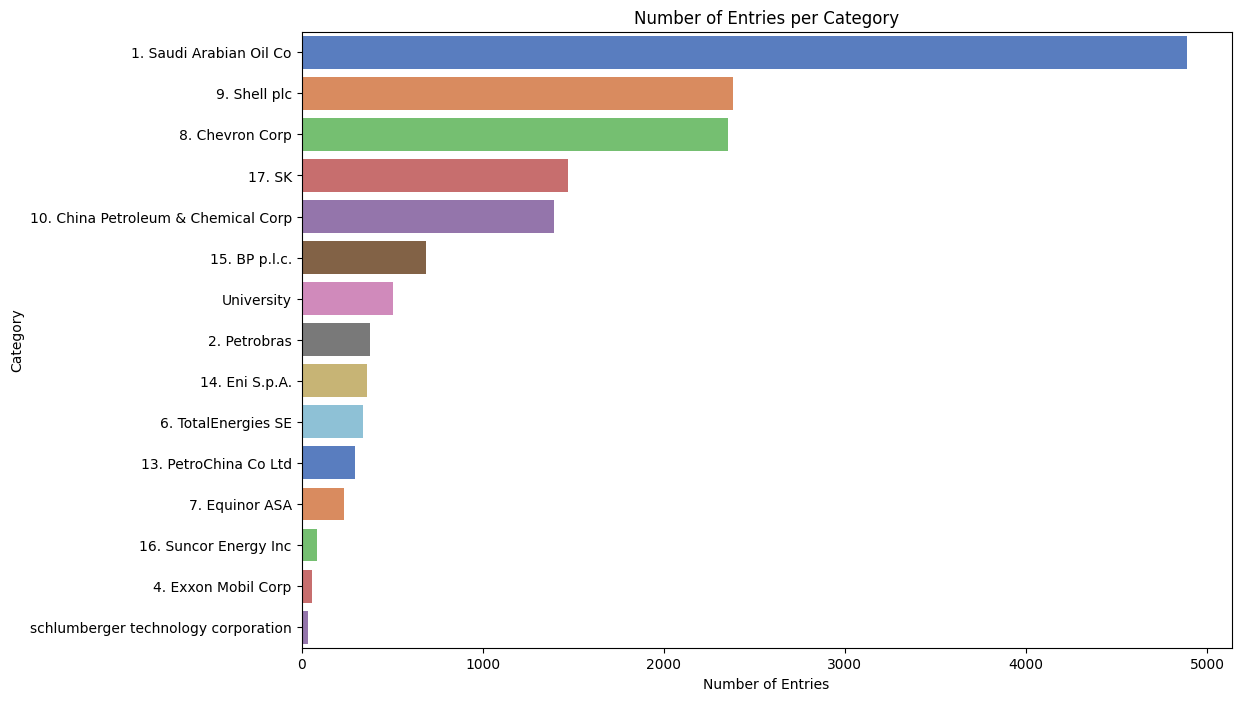

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_company(names, companies_variations):
    result = []
    for name in names:
        category_assigned = False
        for category, variations in companies_variations.items():
            if any(name.lower() in variation.lower() for variation in variations):
                if category == "Miscellaneous":
                    result.append(name)
                else:
                    result.append(category)
                category_assigned = True
                break
        if not category_assigned:
            result.append(name)
    return result


latest_file_path = 'rules_assigning_companies.txt'
data = []
with open(latest_file_path, 'r', encoding='utf-8') as file:
    current_category = ""
    for line in file:
        if line.endswith(":\n"):
            current_category = line[:-2]
        elif line.strip():
            data.append([current_category, line.strip()])

rules = pd.DataFrame(data, columns=["Category", "Name"])
rules_dict = rules.groupby('Category')['Name'].apply(list).to_dict()
print(rules_dict["17. SK"])
print(rules_dict.items())
print(rules_dict.keys())


df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))
df['companies_categorized'] = df['companies'].apply(lambda x: categorize_company(x, rules_dict))

category_counts = df['companies_categorized'].explode().value_counts()
print(category_counts[:30])


# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts[:15].values, y=category_counts[:15].index, palette="muted")
plt.title("Number of Entries per Category")
plt.xlabel("Number of Entries")
plt.ylabel("Category")
plt.show()

In [309]:
df.columns

Index(['일련번호', '번호', '명칭', '요약', '출원인', '출원인국가', '출원인대표명', '발명자', '발명자국가',
       '국제특허분류', '공통특허분류', '미국특허분류', '출원번호', '출원일', '공개번호', '공개일', '공고번호',
       '공고일', '등록번호', '등록일', '우선권번호', '국제출원번호', '국제출원일', '국제공개번호', '국제공개일',
       'INPADOC 패밀리', 'Simple 패밀리', '심사관', '대리인', '지정국가', '독립 청구항수', '전체 청구항수',
       '대표 청구항', '대표 청구항(원문)', '권리 현황', '최종 상태', '현재소유자', '권리만료예상일', '자국인용특허',
       '외국인용특허', '자국피인용특허', '자국인용횟수', '자국피인용횟수', '특허평가등급', '특허평가점수',
       '발명자평가평균등급', '발명자평가평균점수', 'FI', 'F-Term', 'INPADOC패밀리수',
       'INPADOC패밀리국가수', 'Simple패밀리수', 'Simple패밀리국가수', '발명자수', 'Genealogy수',
       '패밀리 번호', '전용실시권자', '통상실시권자', 'INPADOC패밀리국가', 'Simple패밀리국가', '소유권이전여부',
       '소유권최종양도일', '특허전문 Link', 'companies', '출원일_datetime',
       'companies_categorized'],
      dtype='object')

In [310]:
sum(df['공개일'].isna())

333

In [311]:
lv_df = df[['companies_categorized','공개일']].copy()
lv_df['공개일'] = pd.to_datetime(lv_df['공개일'], errors='coerce')

# '공개일' 열에서 연도 정보를 추출
lv_df['연월'] = lv_df['공개일'].dt.year*100+lv_df['공개일'].dt.month
lv_df['연월']

0        202310.0
1        202310.0
2        202310.0
3        202310.0
4        202310.0
           ...   
13426         NaN
13427         NaN
13428         NaN
13429         NaN
13430         NaN
Name: 연월, Length: 13308, dtype: float64

In [312]:
lv_df['companies_categorized_unique'] = lv_df['companies_categorized'].apply(lambda x : list(set(x)))

In [313]:
lv_df = lv_df.dropna() # 연도 없는 거 지우고~

In [314]:
lv_df = lv_df.explode('companies_categorized_unique') [['연월','companies_categorized_unique']]

In [315]:
lv_df['companies_categorized_unique'].value_counts()[:14]

companies_categorized_unique
1. Saudi Arabian Oil Co                4490
8. Chevron Corp                        2188
9. Shell plc                           1939
17. SK                                 1121
10. China Petroleum & Chemical Corp     726
15. BP p.l.c.                           663
University                              481
2. Petrobras                            376
14. Eni S.p.A.                          361
6. TotalEnergies SE                     341
13. PetroChina Co Ltd                   290
7. Equinor ASA                          235
16. Suncor Energy Inc                    88
4. Exxon Mobil Corp                      56
Name: count, dtype: int64

In [316]:
top_company_list =list(lv_df['companies_categorized_unique'].value_counts()[:14].index)

In [317]:
lv_df =lv_df[lv_df['companies_categorized_unique'].isin(top_company_list)]

In [318]:
lv_df = lv_df.groupby(['companies_categorized_unique','연월']).size().unstack().fillna(0)

In [321]:
lv_df.sum(axis=0)

연월
201105.0      2.0
201106.0     10.0
201107.0     16.0
201108.0     18.0
201109.0     25.0
            ...  
202306.0    337.0
202307.0    192.0
202308.0    221.0
202309.0    165.0
202310.0    129.0
Length: 150, dtype: float64

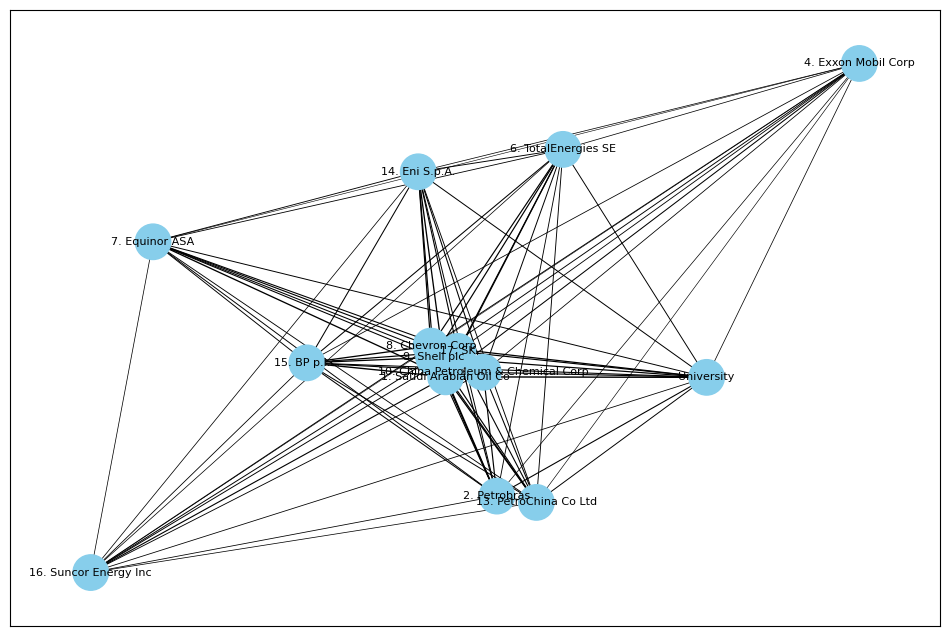

In [203]:

import networkx as nx
import numpy as np
G = nx.Graph()

# 노드 추가
G.add_nodes_from(lv_df.index)

# 간선 추가
for company1 in lv_df.index:
    for company2 in lv_df.index:
        if company1 != company2:
            interaction = lv_df.loc[company1] * lv_df.loc[company2]
            G.add_edge(company1, company2, weight=interaction.sum())

# 네트워크 시각화
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
sizes = [G.degree(node) * 50 for node in G.nodes()]
plt.figure(figsize=(12, 8))  # 그래프의 크기 조정

# 간선의 두께를 더 크게 조정
edge_width = [np.log(edata['weight'])/10 for _, _, edata in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_width)
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.show()

In [204]:
import numpy as np
import scipy.optimize
from scipy.integrate import odeint

In [205]:
time_lst = lv_df.columns
len(lv_df.index) #회사 개수 14개 (agent 개수 14개) -> parameter 196개 

14

In [206]:
yearmonth = list(range(len(time_lst)))

In [207]:
[i for i in range(10) if i!=7]

[0, 1, 2, 3, 4, 5, 6, 8, 9]

In [253]:
def sim(variables, t, params): # params [i*14 + j] 는  i번째 agent의 특허개수가 j번째 agent 에게 미치는 영향 
    #variables[i]는 i번째 회사의 특허 개수
    com_len = len(variables)
    result_lst =[]
    
    for i in range(len(variables)): # i 회사 index, j = 타 회사
        x = variables[i]
        dxdt = x * (params[i*com_len+i] - sum([variables[j]*params[j*com_len+i] for j in range(com_len) if j!=i]) )
        
        result_lst.append(dxdt)
        
    return result_lst

In [254]:
def loss_function(params, yearmonth,variables):
    print(variables)
    y0 = [variable[0] for variable in variables]
    t= np.linspace(yearmonth[0],yearmonth[-1],num = len(yearmonth))
    
    output = odeint(sim,y0,t,args = (params,))
    loss = 0
    
    for i in range(len(yearmonth)):
        for j in range(len(variables)):
            data_value = variables[j][i]
            model_value = output[i,j]
            
            loss+= (data_value-model_value)**2
    return loss
            
            

In [255]:
[variable[0] for variable in lv_df.values]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]

In [276]:
params0 = np.ones((2,2))
minimum = scipy.optimize.fmin(loss_function, params0, args = (yearmonth,lv_df.values[[3,1]])) 

[[ 0.  1.  0.  1.  0.  1.  1.  0.  2.  1.  2.  1.  2.  2.  2.  0.  0.  1.
   0.  1.  2.  2.  2.  4.  4.  1.  2.  3.  1.  4.  8.  4.  3.  3.  4.  2.
   2.  5.  2.  8.  2.  6.  3.  3.  2.  3.  3.  1.  3.  1.  4.  2.  5. 10.
   2.  5.  5.  6.  4.  2.  1.  0.  2.  2.  7.  2.  0.  2.  1.  2.  1.  3.
   3.  4.  0.  6.  0.  1.  7.  1.  0.  0.  3.  0.  4.  2.  2.  3.  1.  0.
   0.  0.  1.  0.  0.  2.  2.  0.  1.  2.  0.  6.  0.  1.  1.  4.  1.  0.
   1.  3.  3.  1.  1.  3.  2.  0.  1.  1.  2.  3.  0.  2.  2.  2.  3.  4.
   4.  8.  2.  3.  5.  2.  7.  5.  1.  6.  7.  2.  1.  7.  5.  1.  2.  1.
   1.  5.  3.  5.  2.  5.]
 [ 0.  0.  1.  0.  2.  3.  0.  4.  1.  0.  3.  4.  4.  0.  1.  0.  0.  1.
   2.  1.  3.  2.  4.  1.  6.  2.  1.  9.  3.  4.  2.  6.  3.  2.  6.  1.
   7.  2.  3.  2.  4.  5.  1.  4.  2.  1.  0.  9.  2.  4.  1.  3.  2.  9.
   2.  3.  2.  2.  0.  5.  5.  2.  1.  3.  8.  2.  1.  1.  2.  3.  2.  4.
   7.  0.  1.  2.  0.  4.  3.  0.  2.  1.  2.  1.  2.  4.  2.  3.  3.  3.
   1.  4.  

In [277]:
print(minimum)

[1. 1. 1. 1.]


In [279]:
df.columns

Index(['일련번호', '번호', '명칭', '요약', '출원인', '출원인국가', '출원인대표명', '발명자', '발명자국가',
       '국제특허분류', '공통특허분류', '미국특허분류', '출원번호', '출원일', '공개번호', '공개일', '공고번호',
       '공고일', '등록번호', '등록일', '우선권번호', '국제출원번호', '국제출원일', '국제공개번호', '국제공개일',
       'INPADOC 패밀리', 'Simple 패밀리', '심사관', '대리인', '지정국가', '독립 청구항수', '전체 청구항수',
       '대표 청구항', '대표 청구항(원문)', '권리 현황', '최종 상태', '현재소유자', '권리만료예상일', '자국인용특허',
       '외국인용특허', '자국피인용특허', '자국인용횟수', '자국피인용횟수', '특허평가등급', '특허평가점수',
       '발명자평가평균등급', '발명자평가평균점수', 'FI', 'F-Term', 'INPADOC패밀리수',
       'INPADOC패밀리국가수', 'Simple패밀리수', 'Simple패밀리국가수', '발명자수', 'Genealogy수',
       '패밀리 번호', '전용실시권자', '통상실시권자', 'INPADOC패밀리국가', 'Simple패밀리국가', '소유권이전여부',
       '소유권최종양도일', '특허전문 Link', 'companies', '출원일_datetime',
       'companies_categorized'],
      dtype='object')

In [296]:
ipc_df =df.dropna(subset=['국제특허분류'])

In [297]:
ipc_df['ipc_lst'] = ipc_df['국제특허분류'].apply(lambda x: x.split(','))

C:\Users\Ksunwoo\AppData\Local\Temp\ipykernel_55696\41174437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipc_df['ipc_lst'] = ipc_df['국제특허분류'].apply(lambda x: x.split(','))


In [305]:
pd.Series([i for i in ipc_df['ipc_lst'].explode().value_counts().index if i[:4]=='B01J']).value_counts()

B01J-029/06     1
B01J-023/06     1
B01J-027/18     1
B01J-008/08     1
B01J-027/047    1
               ..
B01J-020/20     1
B01J-029/44     1
B01J-008/26     1
B01J-020/04     1
B01J-023/656    1
Name: count, Length: 193, dtype: int64

In [303]:
ipc_df['ipc_lst'].explode().value_counts()[:25]

ipc_lst
 B01J-035/10      339
 B01J-037/02      318
 E21B-049/00      281
 B01J-037/08      268
 B01J-037/00      254
 B01J-035/00      243
 G01V-099/00      208
 E21B-047/06      205
 E21B-041/00      205
 G01V-001/30      200
 E21B-043/12      191
 E21B-043/16      188
 B01J-035/02      180
 B01J-029/70      178
 B01J-037/04      175
 G01N-033/24      168
G01V-001/30       165
 H01M-010/0525    162
 E21B-049/08      160
 E21B-047/00      160
 G01N-033/28      159
 E21B-047/12      144
 G01V-001/28      143
 E21B-043/26      143
 B01J-019/24      137
Name: count, dtype: int64

In [306]:
df

,일련번호,번호,명칭,요약,출원인,출원인국가,출원인대표명,발명자,발명자국가,국제특허분류,...,전용실시권자,통상실시권자,INPADOC패밀리국가,Simple패밀리국가,소유권이전여부,소유권최종양도일,특허전문 Link,companies,출원일_datetime,companies_categorized
0,1,WO23196956A1,FOAM STABILIZATION USING NANOPARTICLES,A method of stimulating a hydrocarbon-bearing ...,saudi arabian oil company|aramco services company,SA|US,NaN,"KARADKAR, Prasad, Baburao|HARBI, Bader, G.|BAT...",SA|SA|SA,"C09K-008/60, C09K-008/68, C09K-008/70, C09K-00...",...,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco services company, saudi arabian oil co...",2023-04-07,"[1. Saudi Arabian Oil Co, 1. Saudi Arabian Oil..."
1,2,WO23196806A1,CHROMIUM-CATALYZED REACTIONS OF CARBON MONOXID...,A hydrocarbon compound and carbon monoxide are...,chevron phillips chemical company lp,US,NaN,"MCDANIEL, Max, P.|REFVIK, Mitchell, D.|PRAETOR...",US|US|US|US|US|US|US,"C07B-041/06, C07C-045/49, B01J-023/68, C07C-02...",...,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,[chevron phillips chemical company lp],2023-04-04,[8. Chevron Corp]
2,3,WO23196613A1,METHOD FOR CO2 SEQUESTRATION MEASUREMENT AND Q...,A process for quantifying CO2 sequestration wi...,saudi arabian oil company|aramco services company,SA|US,NaN,"AL-QASIM, Abdulaziz, S.|KOKAL, Sunil",SA|SA,"E21B-041/00, E21B-049/08, E21B-043/16",...,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco services company, saudi arabian oil co...",2023-04-07,"[1. Saudi Arabian Oil Co, 1. Saudi Arabian Oil..."
3,4,WO23195875A1,RADIATION ACTIVATED WELL TREATMENT,A well treatment composition may include a cap...,saudi arabian oil company|aramco innovations llc,SA|RU,NaN,"ZHARNIKOV, Timur|ORLOV, Maxim|CHEN, Tao",RU|RU|SA,"C09K-008/03, C09K-008/524, C09K-008/528, C09K-...",...,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[aramco innovations llc, saudi arabian oil com...",2022-04-08,"[1. Saudi Arabian Oil Co, 1. Saudi Arabian Oil..."
4,5,WO23195710A1,METHOD AND DEVICE FOR PRODUCING WASTE PLASTIC ...,The present disclosure provides a method for p...,"sk innovation co., ltd.|sk geo centric co., ltd.",KR|KR,NaN,"JO, Sanghwan|KANG, Sookil|LEE, Howon|JUNG, Jae...",KR|KR|KR|KR|KR|KR,"C10G-001/10, C10G-001/00, C10G-025/00",...,NaN,NaN,NaN,NaN,NaN,NaN,https://service.wisdomain.net/FullTextService/...,"[sk geo centric co., ltd., sk innovation co., ...",2023-04-03,"[17. SK, 17. SK]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13426,13463,US8517634,"Systems and methods for replacing, repositioni...",Methods and systems are provided for replacing...,chevron u.s.a. inc.,US,CHEVRON USA INC,Liso; Stephen|Harding; Eric|O'Donnell; Thomas,US|US|US,F16L-001/26,...,NaN,NaN,"AU,BR,GB,NO,US,WO","AU,BR,GB,NO,US,WO",N,NaN,https://service.wisdomain.net/FullTextService/...,[chevron u.s.a. inc.],2011-03-30,[8. Chevron Corp]
13427,13464,US8487010,Converting carbon oxides in gas phase fluids,A process for reducing the carbon oxide conten...,chevron u.s.a. inc.,US,CHEVRON USA INC,Thomas; David|Travis; Rod|Moppert; Michael|Kal...,US|US|US|US|US|US,C07C-027/00,...,NaN,NaN,"AU,CA,EP,US,WO","AU,CA,EP,US,WO",N,NaN,https://service.wisdomain.net/FullTextService/...,[chevron u.s.a. inc.],2012-06-27,[8. Chevron Corp]
13428,13465,USRE44206,Oxidation process for the production of carbox...,An oxidation process for the production of alk...,bp chemicals limited,GB,BP CHEMICALS LTD,Ferguson; Ewen James|Lucy; Andrew Richard|Robe...,GB|GB|GB|GB|GB,"C07C-067/00, C07C-051/16",...,NaN,NaN,"AT,BR,CN,EP,ES,GB,JP,KR,MY,NO,RS,RU,TW,UA,US,WO","AT,BR,CN,EP,ES,GB,JP,KR,MY,NO,RS,RU,TW,UA,US,WO",N,NaN,https://service.wisdomain.net/FullTextService/...,[bp chemicals limited],2011-05-16,[15. BP p.l.c.]
13429,13466,US8404912,Process for making high VI lubricating oils,A process for making a high VI lubricating bas...,chevron u.s.a. inc.,US,CHEVRON USA INC,Miller; Stephen Joseph,US,"C10G-047/00, C07C-005/13",...,NaN,NaN,"CA,CN,EP,IN,